## Name - Yuvraj Nitin Pardeshi

## Roll No - 43548

# Assignment no 3 
##  Build the Image classification model by dividing the model into the following fourstages:
    a. Loading and preprocessing the image data
    b. Defining the model’s architecture
    c. Training the model
    d. Estimating the model’s performance

## Cifar 10 image dataset
<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/16_cnn_cifar10_small_image_classification/small_images.jpg"/>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

There are 50000 training images and 10000 testing images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is an 2d array but for our classification we will convert it to 1d array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let plot some images from the dataset 

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

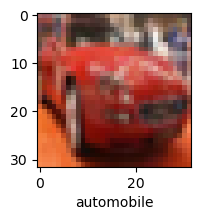

In [11]:
plot_sample(X_train, y_train, 5)

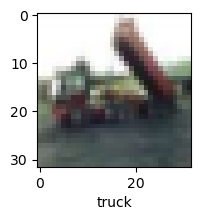

In [12]:
plot_sample(X_train, y_train,2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

## Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Building CNN model

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                      

In [45]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
history = cnn.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 32ms/step - loss: 1.4591 - accuracy: 0.4796 - val_loss: 1.7620 - val_accuracy: 0.4380
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0997 - accuracy: 0.6127 - val_loss: 1.2330 - val_accuracy: 0.5779
Epoch 3/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9494 - accuracy: 0.6671 - val_loss: 1.1718 - val_accuracy: 0.6006
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8384 - accuracy: 0.7056 - val_loss: 1.0074 - val_accuracy: 0.6513
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7605 - accuracy: 0.7322 - val_loss: 0.9636 - val_accuracy: 0.6783
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6889 - accuracy: 0.7594 - val_loss: 0.9031 - val_accuracy: 0.6947
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6220 - accuracy: 0.7797 - val_loss: 1.0063 -

In [47]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.0323 - accuracy: 0.6830


[1.0322877168655396, 0.6830000281333923]

In [48]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[1.25868528e-05, 1.59571428e-04, 9.31800401e-04, 9.67892170e-01,
        2.85683142e-04, 2.36483235e-02, 7.00927107e-03, 1.14019394e-05,
        5.09281381e-06, 4.41468801e-05],
       [2.50267424e-02, 5.92591226e-01, 2.34708641e-05, 1.86861556e-07,
        2.91235347e-09, 3.42638473e-09, 3.49591067e-09, 3.20944452e-11,
        3.67984772e-01, 1.43735344e-02],
       [3.79321784e-01, 4.19033580e-02, 2.20971912e-01, 4.52739634e-02,
        5.61127020e-03, 3.86243267e-03, 4.66658501e-04, 1.15462353e-04,
        2.91216493e-01, 1.12566687e-02],
       [8.23883533e-01, 4.15671654e-02, 2.25839667e-05, 6.43073363e-05,
        9.05578054e-05, 1.97163423e-08, 1.55230566e-06, 3.03615111e-09,
        1.24907166e-01, 9.46316402e-03],
       [2.56856296e-08, 6.56671887e-07, 3.20541137e-03, 1.12655059e-01,
        1.52542844e-01, 1.17585901e-03, 7.30382264e-01, 3.77032411e-05,
        2.39724827e-08, 1.82462372e-07]], dtype=float32)

In [49]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 6]

In [50]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

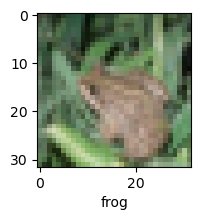

In [51]:
plot_sample(X_test, y_test,4)

In [52]:
classes[y_classes[4]]

'frog'

## Plotting the graphs of Accuracy and loss

In [24]:
from keras import Sequential 

Text(0.5, 1.0, 'Training and Validation Accuracy')

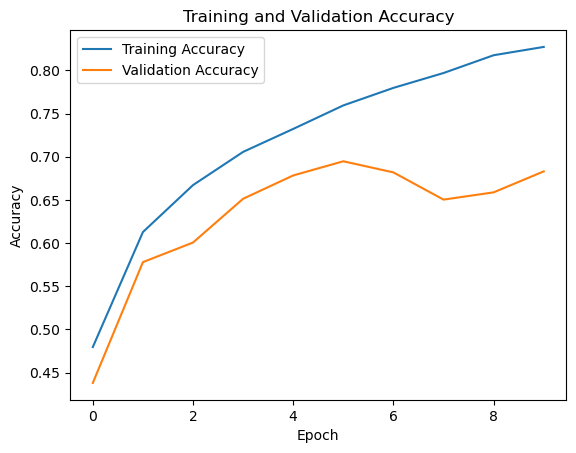

In [53]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

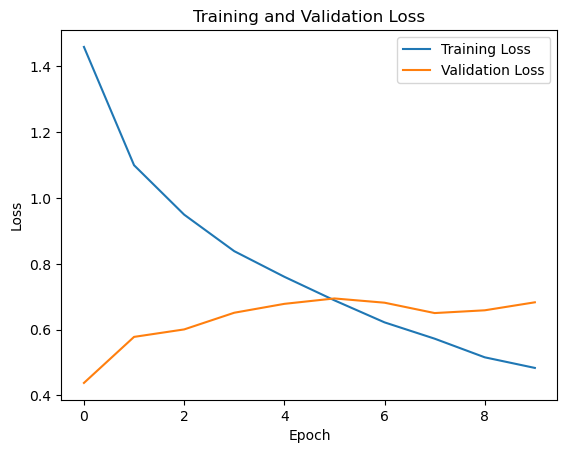

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

In [32]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])
